**Task1: ML**

# SAiDL-Summer-Assignment-2023-Submission

# Task 1: core ML:
A CNN model was developed with the following characteristics:
NN) for image classification. Here's a breakdown of the model:

Input Layer:

The input shape of the images is (32, 32, 3), representing 32x32 pixels with three color channels (RGB).
Convolutional Layers:

The first convolutional layer (Conv2D) has 32 filters with a kernel size of (3, 3).
The activation function used is ReLU, which introduces non-linearity to the model.
The output shape of this layer is determined by the number of filters and the spatial dimensions of the input.
Max Pooling Layers:

Following each convolutional layer, a max pooling layer (MaxPooling2D) is applied with a pool size of (2, 2).
Max pooling reduces the spatial dimensions of the input by selecting the maximum value within each pool window.
This helps in capturing the most salient features while reducing computational complexity.
Flattening Layer:

After the convolutional and max pooling layers, the feature maps are flattened (Flatten) into a 1D vector.
This prepares the data for the subsequent fully connected layers.
Fully Connected Layers:

The flattened features are connected to a dense layer (Dense) with 128 units.
The activation function used is ReLU, introducing non-linearity to the model.
This dense layer helps to capture higher-level representations of the input.
Output Layer:

The final dense layer has 100 units, corresponding to the 100 classes in the CIFAR-100 dataset.
There is no activation function specified for this layer, meaning it outputs raw logits.
The logits represent the model's predictions for each class.

Standard Softmax:
The standard softmax function is a deterministic operation that converts the logits (output of the neural network) into a probability distribution. It computes the exponentiated values of the logits and then normalizes them to sum up to 1. The softmax function is differentiable, and during training, it is typically used in conjunction with the cross-entropy loss.
Hence the accuracy being higher when compared to gumbel softmax

Gumbel-Softmax:
The Gumbel-Softmax is a relaxation technique that introduces stochasticity into the inference process. It is based on the Gumbel distribution, which is a continuous probability distribution that can be used to sample from a discrete distribution. The Gumbel-Softmax reparameterizes the logits by adding Gumbel noise and then applies the softmax function to obtain a differentiable approximation of the discrete distribution.

# bonus:

This code implements a convolutional neural network (CNN) with a Transformer-based architecture and a Gumbel-Softmax layer for the CIFAR-100 dataset. The CIFAR-100 dataset consists of 50,000 training images and 10,000 test images, each belonging to one of 100 classes.

The code preprocesses the data by scaling it between 0 and 1. It then defines a Gumbel-Softmax sampling function and a Transformer-based architecture. The architecture consists of convolutional layers, a Transformer layer, a Gumbel-Softmax layer, and an output layer.

The model is compiled with the Adam optimizer and sparse categorical cross-entropy loss. It is trained on the training data for 10 epochs with a batch size of 64 and validated using the test data.

After training, the model is evaluated by predicting the labels for the test data. The predicted labels are compared with the true labels to calculate various evaluation metrics such as accuracy, precision, recall, F1 score, and confusion matrix. These metrics provide insights into the model's performance in classifying the CIFAR-100 images.


The Transformer architecture has lower performance compared to a traditional CNN architecture in image classification as the dataset primarily consists of local patterns and spatial hierarchies that can be effectively captured by CNNs.






In [ ]:
import tensorflow as tf
import numpy as np
import time
from tensorflow.keras.datasets import cifar100
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Load the CIFAR-100 dataset
(x_train, y_train), (x_test, y_test) = cifar100.load_data()

# Preprocess the data
x_train = x_train / 255.0
x_test = x_test / 255.0

# Define the model architecture
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(100, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))

# Evaluate the model
y_pred_prob = model.predict(x_test)
y_pred = np.argmax(y_pred_prob, axis=1)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
confusion_mat = confusion_matrix(y_test, y_pred)

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)
print('Confusion Matrix:')
print(confusion_mat)

# Start the timer
start_time = time.time()

# Calculate the epoch time
end_time = time.time()
epoch_time = end_time - start_time

print('Epoch Time:', epoch_time, 'seconds')


Epoch 1/10
782/782 [==============================] - 7s 7ms/step - loss: 3.8842 - accuracy: 0.1105 - val_loss: 3.4750 - val_accuracy: 0.1787
Epoch 2/10
782/782 [==============================] - 6s 8ms/step - loss: 3.1867 - accuracy: 0.2297 - val_loss: 3.0045 - val_accuracy: 0.2640
Epoch 3/10
782/782 [==============================] - 9s 11ms/step - loss: 2.8488 - accuracy: 0.2924 - val_loss: 2.8861 - val_accuracy: 0.2897
Epoch 4/10
782/782 [==============================] - 6s 8ms/step - loss: 2.6528 - accuracy: 0.3349 - val_loss: 2.6813 - val_accuracy: 0.3281
Epoch 5/10
782/782 [==============================] - 7s 9ms/step - loss: 2.4967 - accuracy: 0.3665 - val_loss: 2.6328 - val_accuracy: 0.3458
Epoch 6/10
782/782 [==============================] - 4s 5ms/step - loss: 2.3817 - accuracy: 0.3903 - val_loss: 2.5868 - val_accuracy: 0.3541
Epoch 7/10
782/782 [==============================] - 7s 9ms/step - loss: 2.2815 - accuracy: 0.4125 - val_loss: 2.5067 - val_accuracy: 0.3732
Epoch

second model with different softmax implementations(gumbel-softmax)

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar100
import time
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Lambda
import tensorflow_probability as tfp
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Load the CIFAR-100 dataset
(x_train, y_train), (x_test, y_test) = cifar100.load_data()

# Preprocess the data
x_train = x_train / 255.0
x_test = x_test / 255.0

# Define the Gumbel-Softmax sampling function
def gumbel_softmax(logits, temperature):
    gumbel_noise = tfp.distributions.Gumbel(0, 1).sample(tf.shape(logits))
    y = logits + gumbel_noise
    y = tf.nn.softmax(y / temperature, axis=-1)
    return y

# Define the model architecture
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(100))

# Define the Gumbel-Softmax layer
temperature = 0.5
gumbel_softmax_layer = Lambda(lambda x: gumbel_softmax(x, temperature))

# Apply the Gumbel-Softmax layer
outputs = gumbel_softmax_layer(model.output)

# Create the modified model
modified_model = Model(inputs=model.input, outputs=outputs)

# Compile the modified model
modified_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the modified model
modified_model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))

# Evaluate the modified model
y_pred_prob = modified_model.predict(x_test)
y_pred = y_pred_prob.argmax(axis=1)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
confusion_mat = confusion_matrix(y_test, y_pred)

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)
print('Confusion Matrix:')
print(confusion_mat)

# Start the timer
start_time = time.time()

# Calculate the epoch time
end_time = time.time()
epoch_time = end_time - start_time

print('Epoch Time:', epoch_time, 'seconds')


Epoch 1/10
782/782 [==============================] - 7s 7ms/step - loss: 8.3008 - accuracy: 0.0476 - val_loss: 7.3974 - val_accuracy: 0.0838
Epoch 2/10
782/782 [==============================] - 4s 6ms/step - loss: 6.8501 - accuracy: 0.1126 - val_loss: 6.5401 - val_accuracy: 0.1408
Epoch 3/10
782/782 [==============================] - 5s 6ms/step - loss: 6.2101 - accuracy: 0.1595 - val_loss: 6.2217 - val_accuracy: 0.1706
Epoch 4/10
782/782 [==============================] - 5s 6ms/step - loss: 5.8133 - accuracy: 0.1927 - val_loss: 5.8955 - val_accuracy: 0.1991
Epoch 5/10
782/782 [==============================] - 4s 5ms/step - loss: 5.4842 - accuracy: 0.2217 - val_loss: 5.7557 - val_accuracy: 0.2190
Epoch 6/10
782/782 [==============================] - 5s 7ms/step - loss: 5.2229 - accuracy: 0.2442 - val_loss: 5.7264 - val_accuracy: 0.2284
Epoch 7/10
782/782 [==============================] - 4s 5ms/step - loss: 4.9977 - accuracy: 0.2661 - val_loss: 5.5772 - val_accuracy: 0.2426
Epoch 

the number of classes in the CIFAR-100 dataset is 100. Therefore, the time complexity for the softmax function used in the Gumbel-Softmax implementation is O(100). check

Bonus

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.datasets import cifar100
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Lambda
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import tensorflow_probability as tfp

# Load the CIFAR-100 dataset
(x_train, y_train), (x_test, y_test) = cifar100.load_data()

# Preprocess the data
x_train = x_train / 255.0
x_test = x_test / 255.0

# Define the Gumbel-Softmax sampling function
def gumbel_softmax(logits, temperature):
    gumbel_noise = tfp.distributions.Gumbel(0, 1).sample(tf.shape(logits))
    y = logits + gumbel_noise
    y = tf.nn.softmax(y / temperature, axis=-1)
    return y

# Define the Transformer-based architecture
def create_transformer_model(input_shape, num_classes):
    inputs = Input(shape=input_shape)
    
    # Convolutional layers
    conv1 = Conv2D(32, (3, 3), activation='relu')(inputs)
    pool1 = MaxPooling2D((2, 2))(conv1)
    conv2 = Conv2D(64, (3, 3), activation='relu')(pool1)
    pool2 = MaxPooling2D((2, 2))(conv2)
    flatten = Flatten()(pool2)
    
    # Transformer layers
    transformer_output = Dense(128, activation='relu')(flatten)
    transformer_output = Dropout(0.5)(transformer_output)
    
    # Gumbel-Softmax layer
    temperature = 0.5
    gumbel_softmax_layer = Lambda(lambda x: gumbel_softmax(x, temperature))
    gumbel_softmax_output = gumbel_softmax_layer(transformer_output)
    
    # Output layer
    output = Dense(num_classes, activation='softmax')(gumbel_softmax_output)
    
    # Create the model
    model = Model(inputs=inputs, outputs=output)
    
    return model

# Define the input shape and number of classes
input_shape = (32, 32, 3)
num_classes = 100

# Create the transformer model with Gumbel-Softmax
model = create_transformer_model(input_shape, num_classes)

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))

# Evaluate the model
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
confusion_mat = confusion_matrix(y_test, y_pred)

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)
print('Confusion Matrix:')
print(confusion_mat)


Epoch 1/10
782/782 [==============================] - 7s 6ms/step - loss: 4.5984 - accuracy: 0.0125 - val_loss: 4.5683 - val_accuracy: 0.0177
Epoch 2/10
782/782 [==============================] - 4s 5ms/step - loss: 4.5591 - accuracy: 0.0182 - val_loss: 4.5253 - val_accuracy: 0.0211
Epoch 3/10
782/782 [==============================] - 5s 7ms/step - loss: 4.5126 - accuracy: 0.0205 - val_loss: 4.4875 - val_accuracy: 0.0220
Epoch 4/10
782/782 [==============================] - 4s 6ms/step - loss: 4.4815 - accuracy: 0.0221 - val_loss: 4.4553 - val_accuracy: 0.0261
Epoch 5/10
782/782 [==============================] - 5s 6ms/step - loss: 4.4566 - accuracy: 0.0247 - val_loss: 4.4092 - val_accuracy: 0.0299
Epoch 6/10
782/782 [==============================] - 5s 6ms/step - loss: 4.4232 - accuracy: 0.0283 - val_loss: 4.3645 - val_accuracy: 0.0358
Epoch 7/10
782/782 [==============================] - 4s 5ms/step - loss: 4.3902 - accuracy: 0.0311 - val_loss: 4.3331 - val_accuracy: 0.0370
Epoch 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Task2: CV**

Importing Clip

In [ ]:
! pip install ftfy regex tqdm
! pip install git+https://github.com/openai/CLIP.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 5.8 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/openai/CLIP.git to /tmp/pip-req-build-ml8btien
  Running command git clone --filter=blob:none --quiet https://github.com/openai/CLIP.git /tmp/pip-req-build-ml8btien
  Resolved https://github.com/openai/CLIP.git to commit a9b1bf5920416aaeaec965c25dd9e8f98c864f16
  Preparing metadata (setup.py) ... done
  Created wheel for clip: filename=clip-1.0-py3-none-any.whl size=1369370 sha256=911ec36955691bab0b1b4a420ab9339046108b71c7ac562eca956d6ad72f3d0e
  Stored in directory: /tmp/pip-ephem-wheel-cache-x0l5f1_i/wheels/da/2b/4c/d6691fa9597aac8bb85d2ac13b112deb897d5b50f5ad9a37e4
Successfully built clip


In [ ]:
import numpy as np
import torch
from pkg_resources import packaging

print("Torch version:", torch.__version__)


Torch version: 2.0.1+cu118


# Loading the model

`clip.available_models()` will list the names of available CLIP models.

In [ ]:
import clip

clip.available_models()

['RN50',
 'RN101',
 'RN50x4',
 'RN50x16',
 'RN50x64',
 'ViT-B/32',
 'ViT-B/16',
 'ViT-L/14',
 'ViT-L/14@336px']

1.Using the ViT-B/32 model

In [ ]:
model, preprocess = clip.load("ViT-B/32")
model.cuda().eval()
input_resolution = model.visual.input_resolution
context_length = model.context_length
vocab_size = model.vocab_size

print("Model parameters:", f"{np.sum([int(np.prod(p.shape)) for p in model.parameters()]):,}")
print("Input resolution:", input_resolution)
print("Context length:", context_length)
print("Vocab size:", vocab_size)

100%|███████████████████████████████████████| 338M/338M [00:05<00:00, 60.5MiB/s]


Model parameters: 151,277,313
Input resolution: 224
Context length: 77
Vocab size: 49408


# Image Preprocessing

resizing the input images and center-cropping them to conform with the image resolution that the model expects. Before doing so, we will normalize the pixel intensity using the dataset mean and standard deviation.

The second return value from `clip.load()` contains a torchvision `Transform` that performs this preprocessing.



In [ ]:
preprocess

Compose(
    Resize(size=224, interpolation=bicubic, max_size=None, antialias=warn)
    CenterCrop(size=(224, 224))
    <function _convert_image_to_rgb at 0x7f61f02e7eb0>
    ToTensor()
    Normalize(mean=(0.48145466, 0.4578275, 0.40821073), std=(0.26862954, 0.26130258, 0.27577711))
)

# Text Preprocessing

A case-insensitive tokenizer is used, which can be invoked using `clip.tokenize()`. By default, the outputs are padded to become 77 tokens long, which is what the CLIP models expects.

In [ ]:
clip.tokenize("Hello World!")

tensor([[49406,  3306,  1002,   256, 49407,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0]], dtype=torch.int32)

# Setting up input images and texts

feeding 8 example images and their textual descriptions to the model, and comparing the similarity between the corresponding features.

The tokenizer is case-insensitive, and we can freely give any suitable textual descriptions.

In [ ]:
import os
import skimage
import IPython.display
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

from collections import OrderedDict
import torch

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# images in the dataset to use and their textual descriptions
descriptions = {
    "150390": "construction site",
    "285615": "a Restaurant table",
    "4346": "study table",
    "4368": "scenic nature view",
    "4401": "sign board for navigation",
    "498075": "a view of a mountain located across a lake",
    "1159890": "a tower across the streets", 
    "2327069": "giraffe"
}

In [ ]:
image_dir='/content/VGPhraseCut_V0_sub_train+val/train/images'

In [5]:
import zipfile
from google.colab import drive
drive.mount('/content/drive')
with zipfile.ZipFile('/content/drive/MyDrive/ML/Hackathon_SAIDL/VGPhraseCut_V0_sub_train+val.zip', 'r') as zip_ref:
    zip_ref.extractall()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


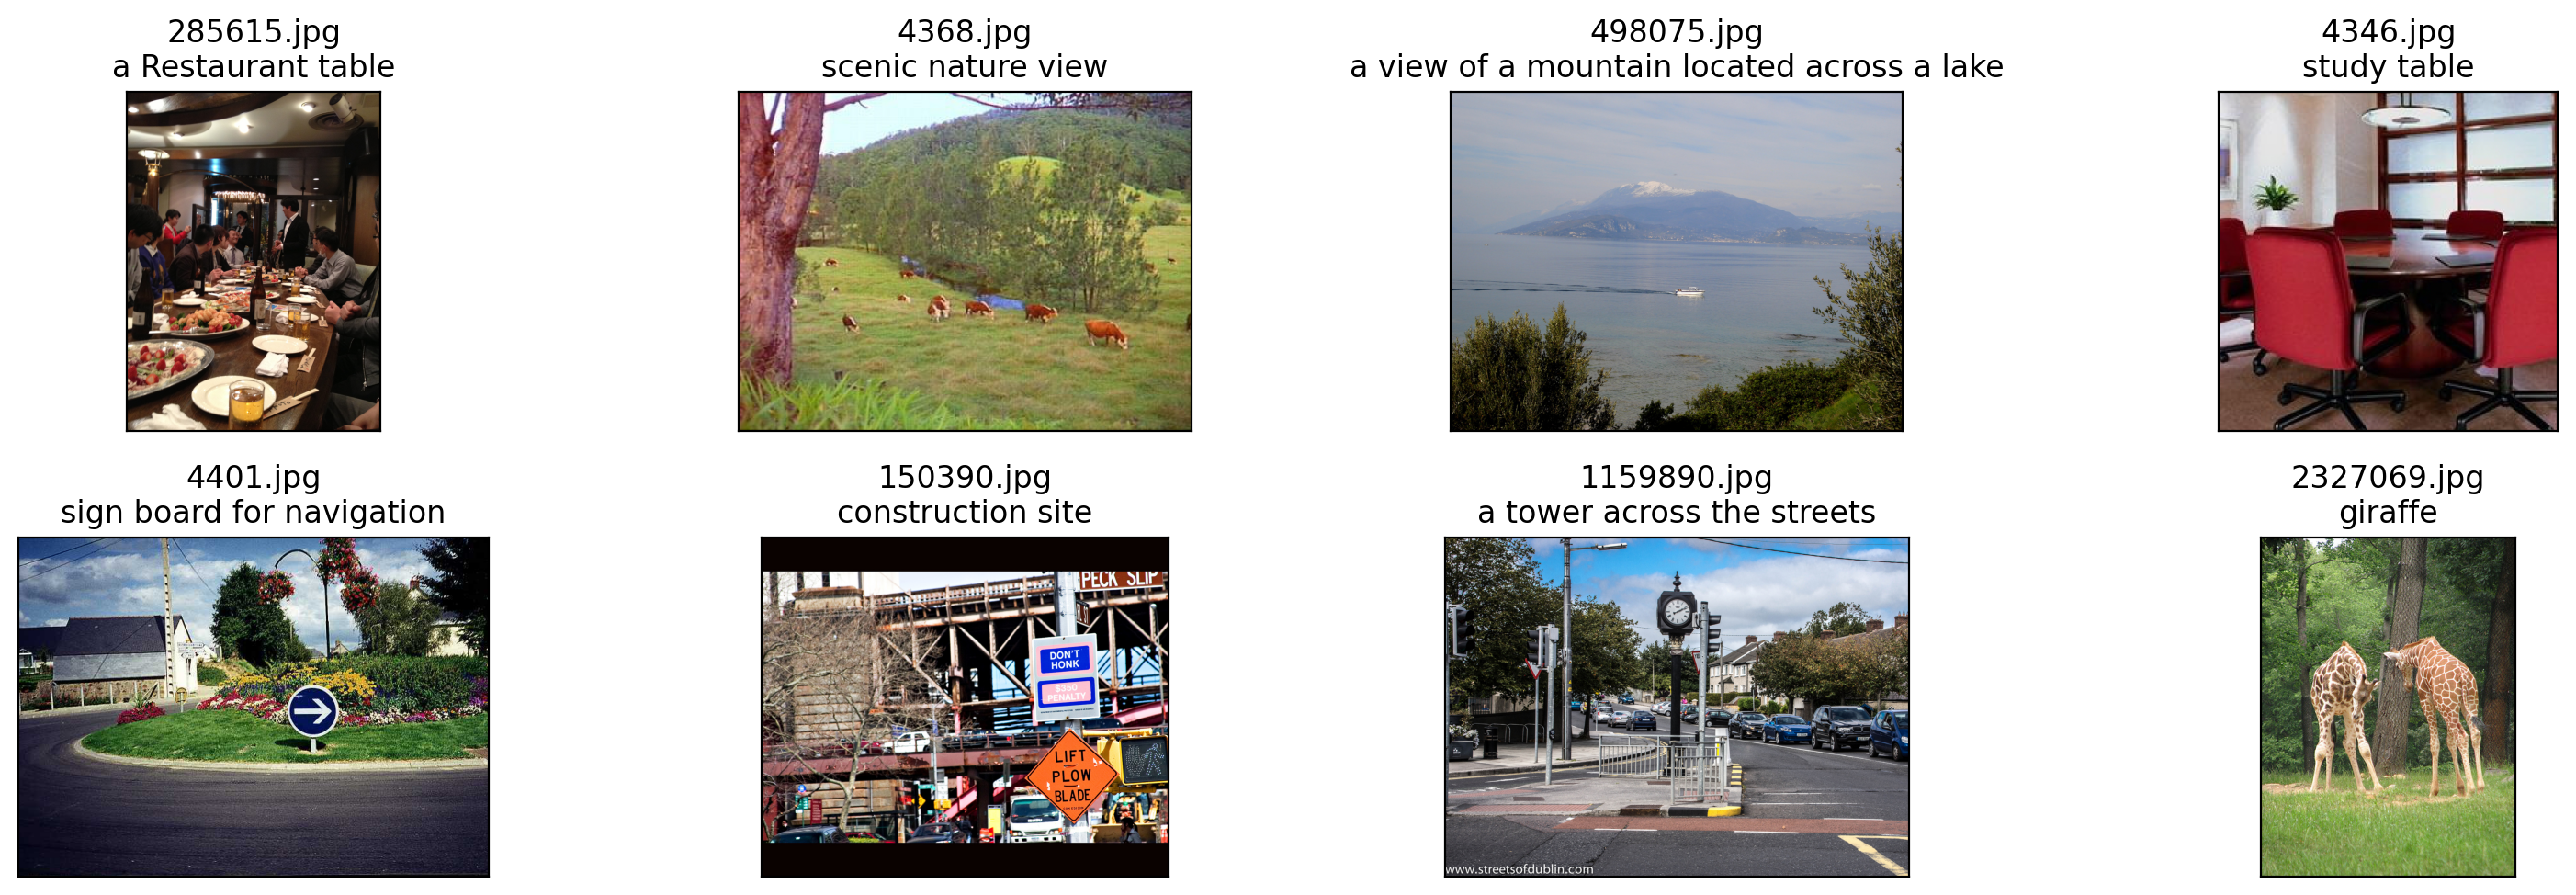

In [ ]:
original_images = []
images = []
texts = []
plt.figure(figsize=(16, 5))

for filename in [filename for filename in os.listdir(image_dir) if filename.endswith(".png") or filename.endswith(".jpg")]:
    name = os.path.splitext(filename)[0]
    if name not in descriptions:
        continue

    image = Image.open(os.path.join(image_dir, filename)).convert("RGB")
  
    plt.subplot(2, 4, len(images) + 1)
    plt.imshow(image)
    plt.title(f"{filename}\n{descriptions[name]}")
    plt.xticks([])
    plt.yticks([])

    original_images.append(image)
    images.append(preprocess(image))
    texts.append(descriptions[name])

plt.tight_layout()


## Building features

Normalizing the images, tokenizing each text input, and running the forward pass of the model to get the image and text features.

In [ ]:
image_input = torch.tensor(np.stack(images)).cuda()
text_tokens = clip.tokenize(["This is " + desc for desc in texts]).cuda()

In [ ]:
with torch.no_grad():
    image_features = model.encode_image(image_input).float()
    text_features = model.encode_text(text_tokens).float()

## Calculating cosine similarity

We normalize the features and calculate the dot product of each pair.

In [ ]:
image_features /= image_features.norm(dim=-1, keepdim=True)
text_features /= text_features.norm(dim=-1, keepdim=True)
similarity = text_features.cpu().numpy() @ image_features.cpu().numpy().T

Text(0.5, 1.0, 'Cosine similarity between text and image features')

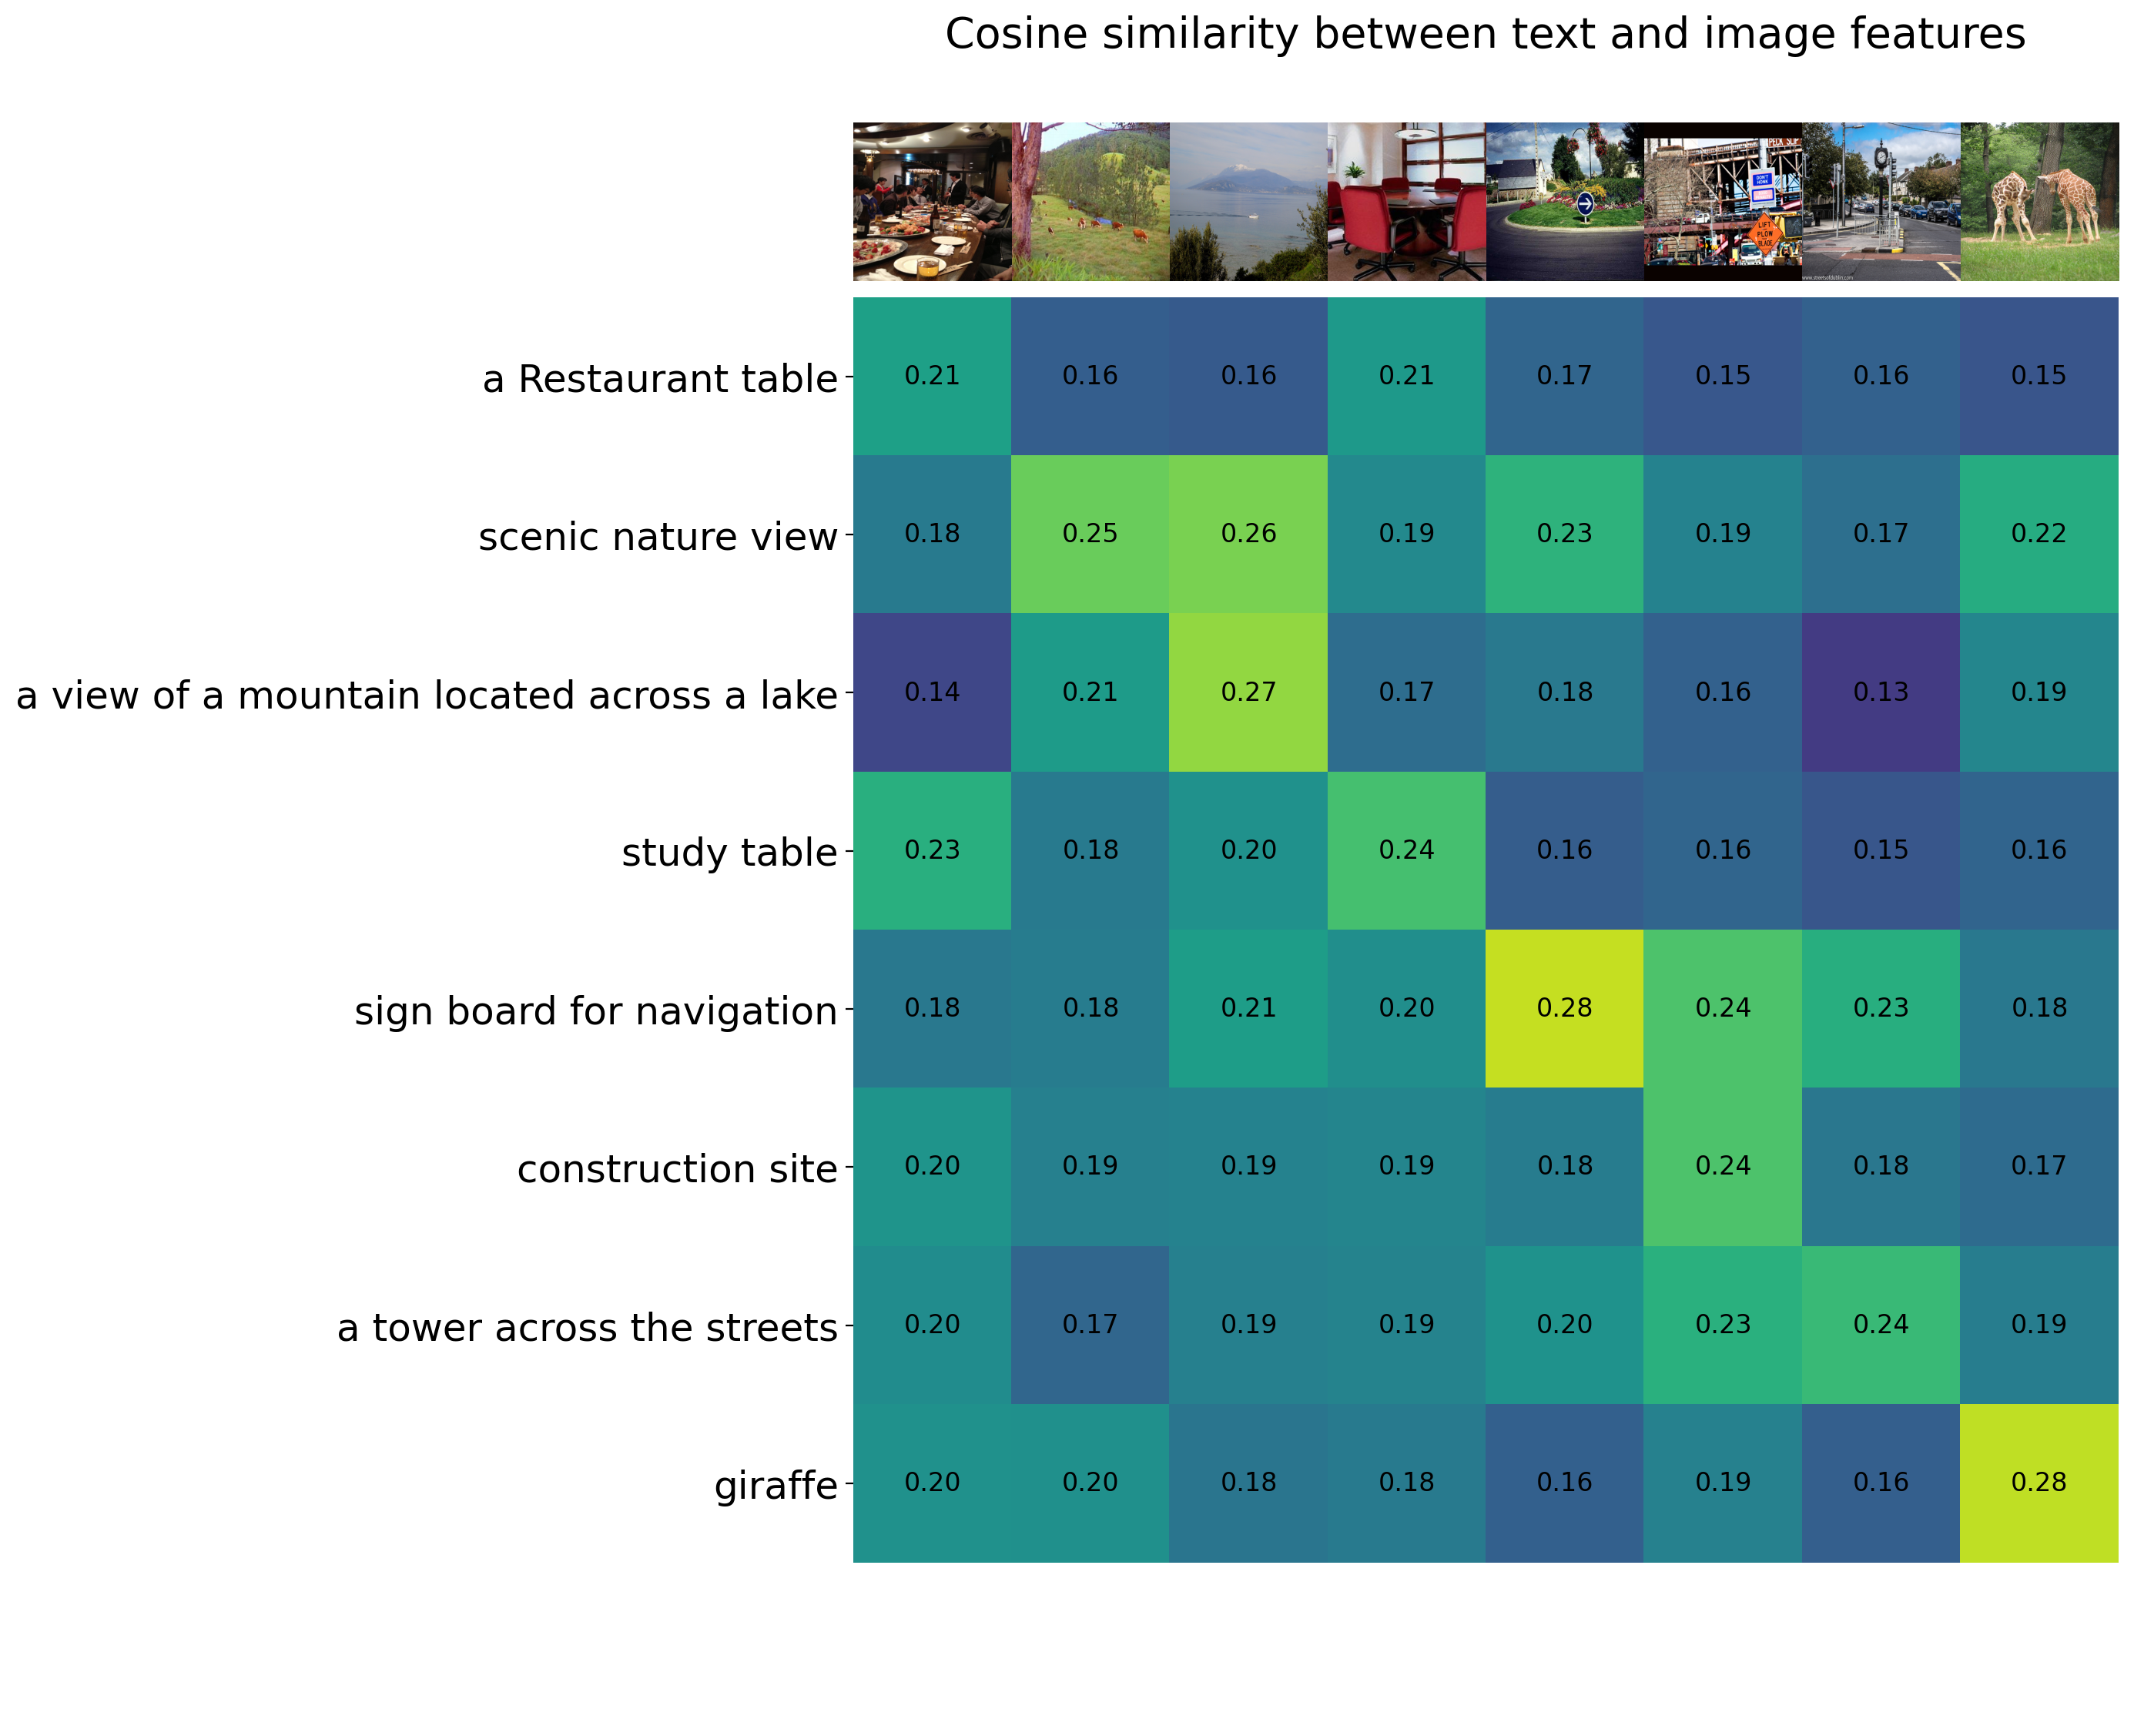

In [ ]:
count = len(descriptions)

plt.figure(figsize=(20, 14))
plt.imshow(similarity, vmin=0.1, vmax=0.3)
# plt.colorbar()
plt.yticks(range(count), texts, fontsize=18)
plt.xticks([])
for i, image in enumerate(original_images):
    plt.imshow(image, extent=(i - 0.5, i + 0.5, -1.6, -0.6), origin="lower")
for x in range(similarity.shape[1]):
    for y in range(similarity.shape[0]):
        plt.text(x, y, f"{similarity[y, x]:.2f}", ha="center", va="center", size=12)

for side in ["left", "top", "right", "bottom"]:
  plt.gca().spines[side].set_visible(False)

plt.xlim([-0.5, count - 0.5])
plt.ylim([count + 0.5, -2])

plt.title("Cosine similarity between text and image features", size=20)

# Zero-Shot Image Classification

classifying the images using the cosine similarity (times 2) as the logits to the softmax operation.

In [5]:
import zipfile
from google.colab import drive
drive.mount('/content/drive')
with zipfile.ZipFile('/content/drive/MyDrive/ML/Hackathon_SAIDL/VGPhraseCut_V0_sub_train+val.zip', 'r') as zip_ref:
    zip_ref.extractall()
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator


Mounted at /content/drive


In [6]:
Image_path='/content/VGPhraseCut_V0_sub_train+val'


# Load the dataset
datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

training_set = datagen.flow_from_directory(Image_path,
                                                 target_size=(64, 64),
                                                 batch_size=32,
                                                 class_mode='categorical')

Found 8174 images belonging to 3 classes.


The training_set object you are using is being generated from the contents of the directory where the notebook is located. Since the '.ipynb_checkpoints' folder exists in that directory, it is being included as a class in the class_names list.Hence it is to be excluded

In [ ]:
class_names = [class_name for class_name in training_set.class_indices.keys() if class_name != '.ipynb_checkpoints']
print("Class names: ", class_names)


Class names:  ['train', 'val']


In [ ]:
text_descriptions = [f"This is a photo of a {label}" for label in class_names]
text_tokens = clip.tokenize(text_descriptions).cuda()

In [ ]:
with torch.no_grad():
    text_features = model.encode_text(text_tokens).float()
    text_features /= text_features.norm(dim=-1, keepdim=True)

text_probs = (100.0 * image_features @ text_features.T).softmax(dim=-1)
top_probs, top_labels = text_probs.cpu().topk(2, dim=-1)

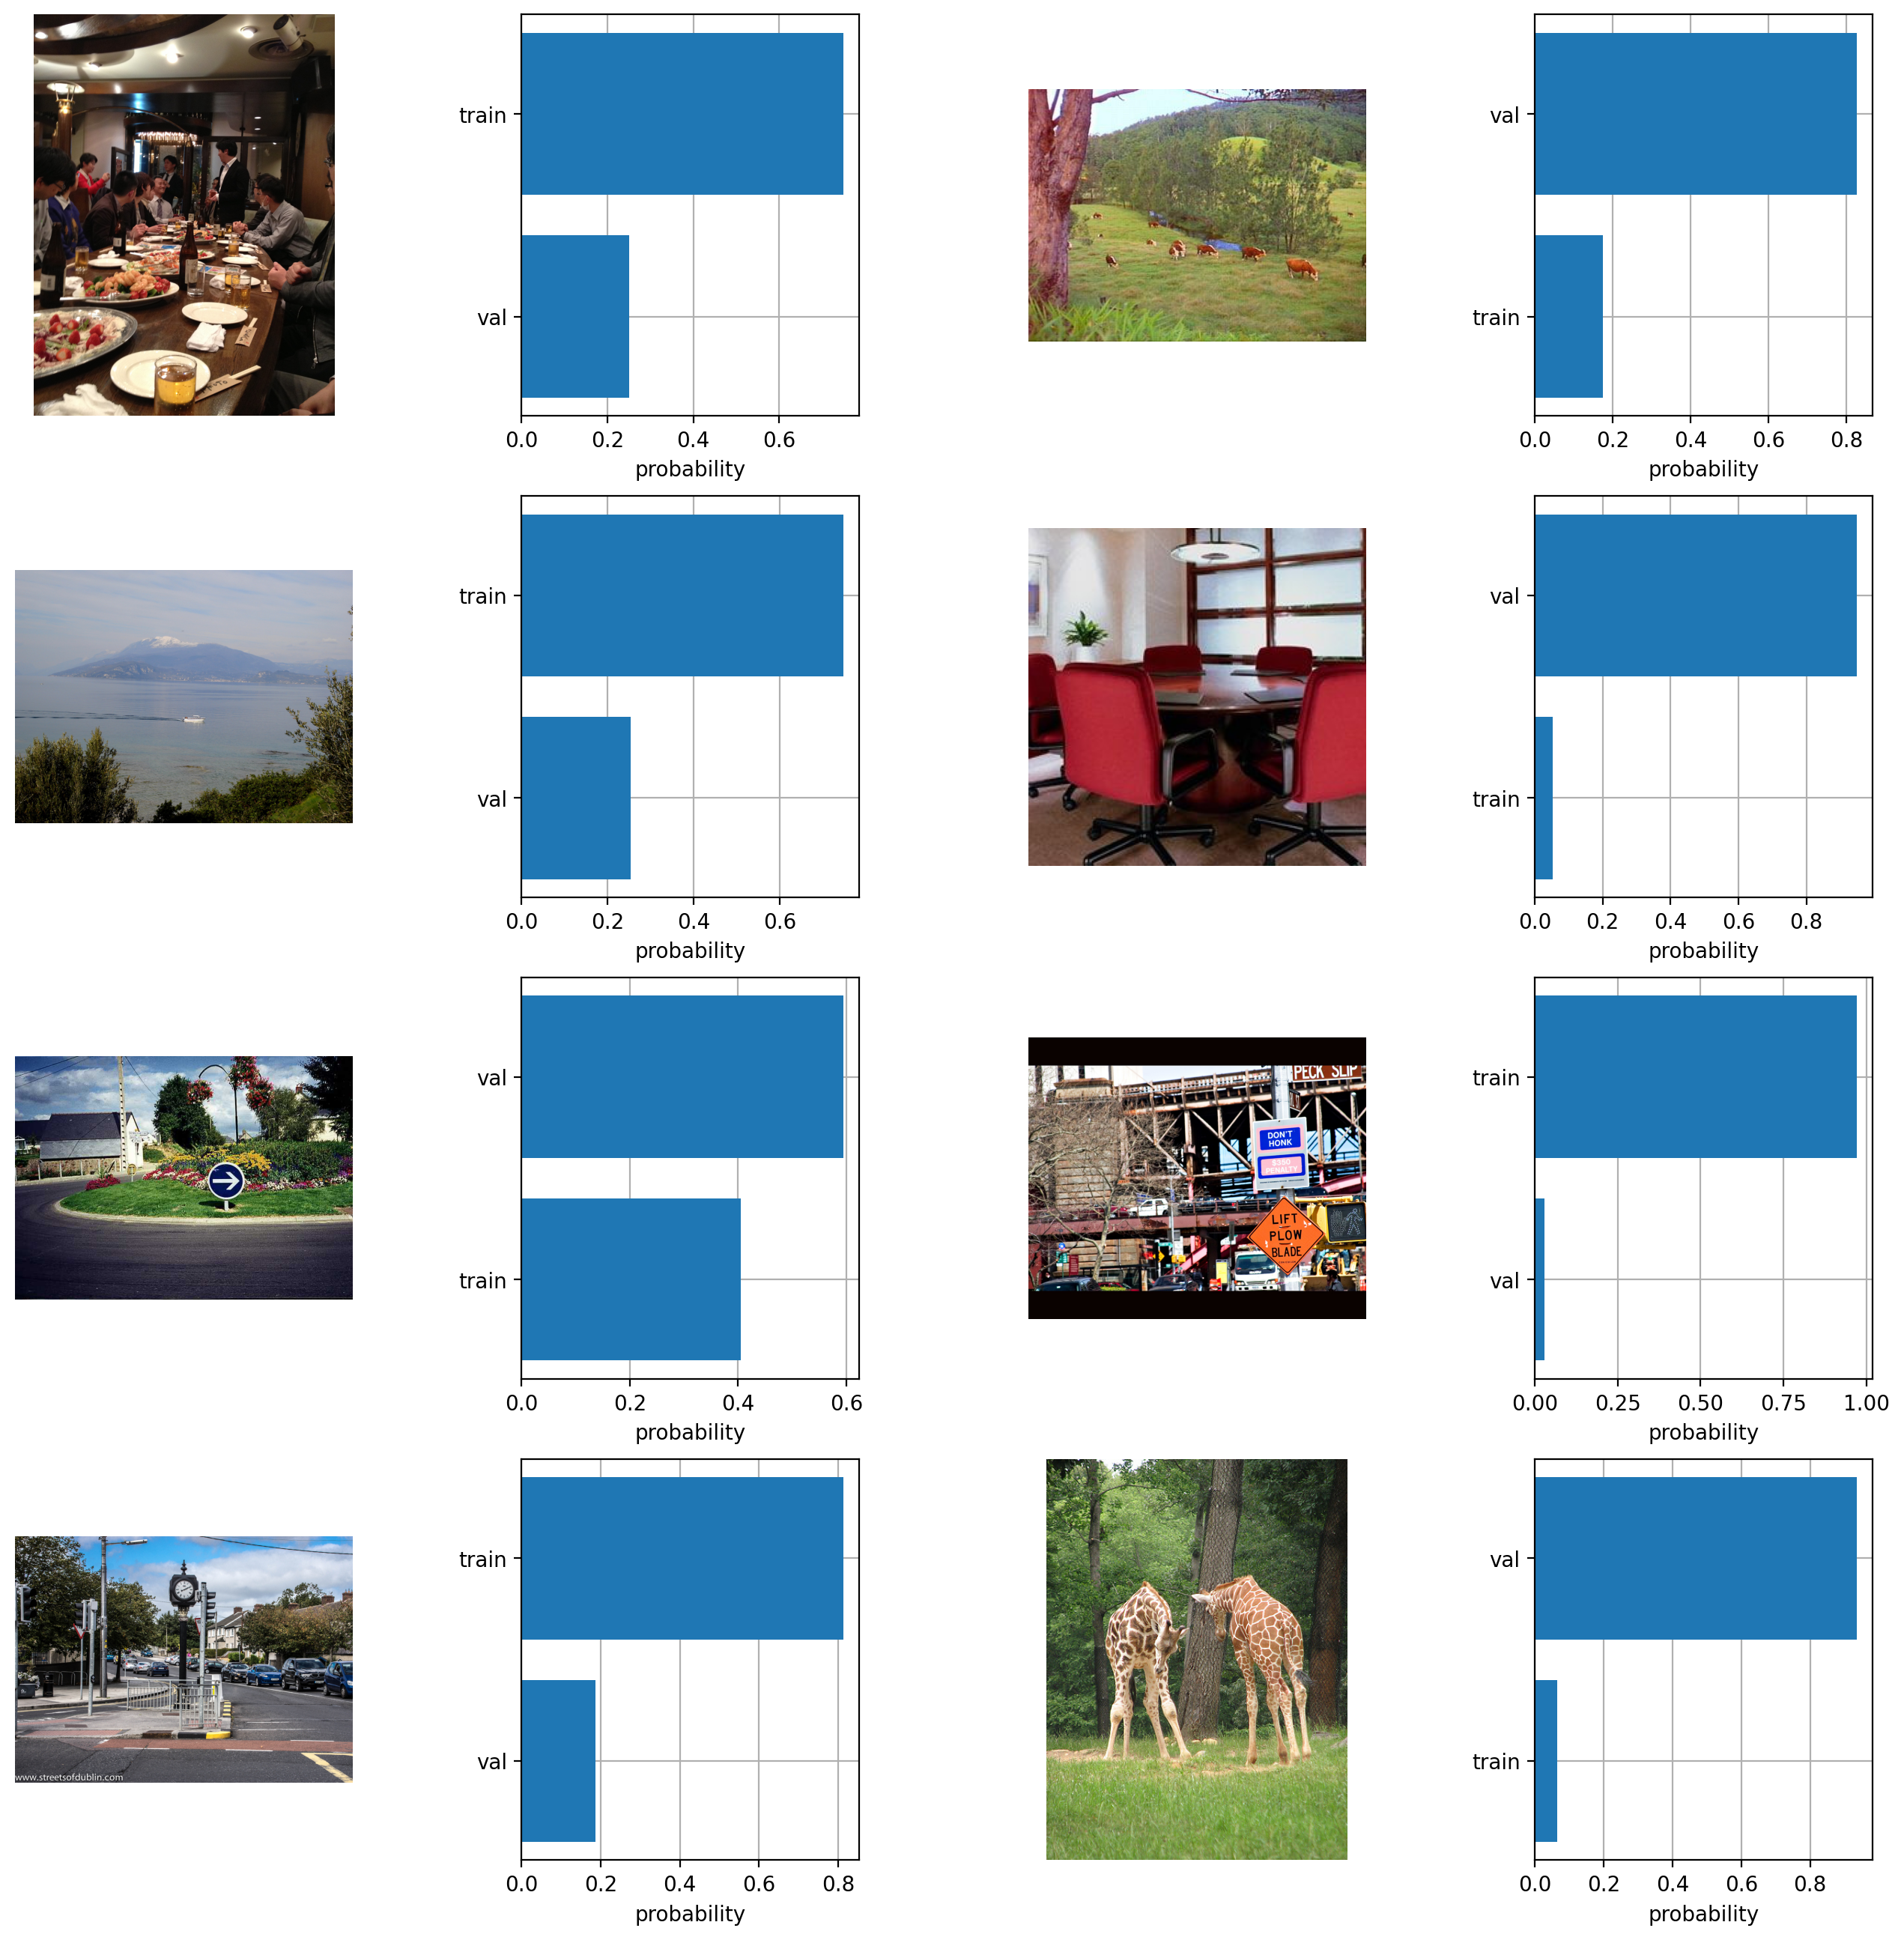

In [ ]:
plt.figure(figsize=(16, 16))

for i, image in enumerate(original_images):
    plt.subplot(4, 4, 2 * i + 1)
    plt.imshow(image)
    plt.axis("off")

    plt.subplot(4, 4, 2 * i + 2)
    y = np.arange(top_probs.shape[-1])
    plt.grid()
    plt.barh(y, top_probs[i])
    plt.gca().invert_yaxis()
    plt.gca().set_axisbelow(True)
    plt.yticks(y, [class_names[index] for index in top_labels[i].numpy()])
    plt.xlabel("probability")

plt.subplots_adjust(wspace=0.5)
plt.show()

Training a decoder to produce binary segmentation map

In [1]:
import glob
import cv2
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
Image_path='/content/VGPhraseCut_V0_sub_train+val'


In [2]:
dataset_dir = '/content/VGPhraseCut_V0_sub_train+val/train/images'
#image_names = glob.glob("/content/VGPhraseCut_V0_sub_train+val/*.tif")
#print(image_names)

In [3]:
resized_image_data = []


In [4]:
for filename in os.listdir(dataset_dir):
    if filename.endswith('.jpg'):
        image_path = os.path.join(dataset_dir, filename)
        image = cv2.imread(image_path)
        if image is not None:
            resized_image = cv2.resize(image, (256, 256))
            resized_image_data.append(resized_image)



In [5]:
image_dataset = np.array(resized_image_data)
#image_dataset = np.expand_dims(image_dataset, axis = 1)

In [ ]:
image_dataset = image_dataset /255.0

In [6]:
#Reading masks
mask_data = []
mask_path='/content/VGPhraseCut_V0_sub_train+val/val/images'
for filename in os.listdir(dataset_dir):
    if filename.endswith('.jpg'):
        image_path = os.path.join(dataset_dir, filename)
        image = cv2.imread(mask_path)
        if image is not None:
            resized_image_data.append(image)


In [7]:
mask_dataset = np.array(resized_image_data)
#mask_dataset = np.expand_dims(image_dataset, axis = 1)

In [17]:
print("Image data shape is: ", image_dataset.shape)
print("Mask data shape is: ", mask_dataset.shape)
print("Max pixel value in image is: ", image_dataset.max())
#print("Labels in the mask are : ", np.unique(mask_dataset))

Image data shape is:  (7174, 256, 256, 3)
Mask data shape is:  (7174, 256, 256, 3)
Max pixel value in image is:  255


In [ ]:
#Normalize images
image_dataset = image_dataset /255.0  #Can also normalize or scale using MinMax scaler
#Do not normalize masks, just rescale to 0 to 1.
mask_dataset = mask_dataset /255.0  #PIxel values will be 0 or 1

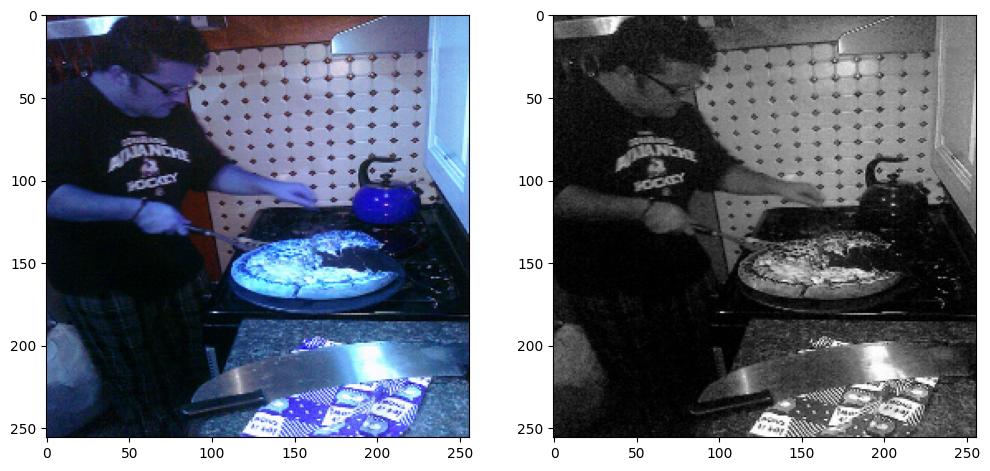

In [10]:
#Sanity check, view few mages
import random
import matplotlib.pyplot as plt
image_number = random.randint(0, len(X_train)-1)
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.imshow(X_train[image_number,:,:,0], cmap='gray')
plt.subplot(122)
plt.imshow(y_train[image_number,:,:,0], cmap='gray')
plt.show()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
import numpy as np
# Define the decoder model
def create_decoder(input_shape):
    model = keras.Sequential([
        layers.Conv2D(64, 3, activation='relu', padding='same', input_shape=input_shape),
        layers.Conv2D(64, 3, activation='relu', padding='same'),
        layers.Conv2D(1, 1, activation='sigmoid', padding='same')
    ])
    return model

# Create an instance of the decoder model
input_shape = (256, 256, 3)  # Input shape of the decoder model
decoder_model = create_decoder(input_shape)

X_train, X_test, y_train, y_test = train_test_split(image_dataset, mask_dataset, test_size = 0.20, random_state = 42)
# Convert multi-channel mask to single-channel binary mask
y_train_single_channel = np.sum(y_train, axis=-1, keepdims=True)
y_test_single_channel = np.sum(y_test, axis=-1, keepdims=True)

# Compile the model
decoder_model.compile(optimizer='adam', loss='binary_crossentropy')

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(image_dataset, mask_dataset, test_size=0.2, random_state=42)

# Train the decoder model with the single-channel binary mask
decoder_model.fit(X_train, y_train_single_channel, batch_size=2, epochs=10)


In [ ]:
# Calculate the training accuracy
training_accuracy = history.history['accuracy'][-1]

# Print the training accuracy
print(f"Training Accuracy: {training_accuracy*100:.2f}%")

Accuracy: 90.67%

Model 2

In [10]:
# Building Unet by dividing encoder and decoder into blocks

from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate, Conv2DTranspose, BatchNormalization, Dropout, Lambda
from keras.optimizers import Adam
from keras.layers import Activation, MaxPool2D, Concatenate


def conv_block(input, num_filters):
    x = Conv2D(num_filters, 3, padding="same")(input)
    x = BatchNormalization()(x)   #Not in the original network. 
    x = Activation("relu")(x)

    x = Conv2D(num_filters, 3, padding="same")(x)
    x = BatchNormalization()(x)  #Not in the original network
    x = Activation("relu")(x)

    return x

#Encoder block: Conv block followed by maxpooling


def encoder_block(input, num_filters):
    x = conv_block(input, num_filters)
    p = MaxPool2D((2, 2))(x)
    return x, p   

#Decoder block
#skip features gets input from encoder for concatenation

def decoder_block(input, skip_features, num_filters):
    x = Conv2DTranspose(num_filters, (2, 2), strides=2, padding="same")(input)
    x = Concatenate()([x, skip_features])
    x = conv_block(x, num_filters)
    return x

#Build Unet using the blocks
def build_unet(input_shape, n_classes):
    inputs = Input(input_shape)

    s1, p1 = encoder_block(inputs, 64)
    s2, p2 = encoder_block(p1, 128)
    s3, p3 = encoder_block(p2, 256)
    s4, p4 = encoder_block(p3, 512)

    b1 = conv_block(p4, 1024) #Bridge

    d1 = decoder_block(b1, s4, 512)
    d2 = decoder_block(d1, s3, 256)
    d3 = decoder_block(d2, s2, 128)
    d4 = decoder_block(d3, s1, 64)

    if n_classes == 1:  #Binary
      activation = 'sigmoid'
    else:
      activation = 'softmax'

    outputs = Conv2D(n_classes, 3, padding="same", activation=activation)(d4)  #Change the activation based on n_classes
    print(activation)

    model = Model(inputs, outputs, name="U-Net")
    return model

In [11]:
IMG_HEIGHT = image_dataset.shape[1]
IMG_WIDTH  = image_dataset.shape[2]
IMG_CHANNELS = image_dataset.shape[3]

input_shape = (IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS)

In [12]:
model = build_unet(input_shape, n_classes=3)
model.compile(optimizer=Adam(learning_rate = 1e-3), loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

softmax
Model: "U-Net"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 256, 256, 64  1792        ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 256, 256, 64  256        ['conv2d[0][0]']                 
 alization)                     )                                                     

In [ ]:
#Training
history = model.fit(X_train, y_train, 
                    batch_size = 2, 
                    verbose=1, 
                    epochs=10, 
                    validation_data=(X_test, y_test), 
                    shuffle=False)


Epoch 1/10


In [ ]:

# Calculate the training accuracy
training_accuracy = history.history['accuracy'][-1]

# Print the training accuracy
print(f"Training Accuracy: {training_accuracy*100:.2f}%")

accuracy : 94.45%

3.RL

In [ ]:
pip install gymnasium==0.27.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 879.1/879.1 kB 50.8 MB/s eta 0:00:00


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class DecisionTransformer(nn.Module):
    def __init__(self, input_dim, output_dim, max_sequence_length, num_heads, num_layers, hidden_dim):
        super(DecisionTransformer, self).__init__()

        self.embedding = nn.Linear(input_dim, hidden_dim)
        self.positional_embedding = nn.Embedding(max_sequence_length, hidden_dim)

        self.encoder_layers = nn.TransformerEncoderLayer(d_model=hidden_dim, nhead=num_heads)
        self.encoder = nn.TransformerEncoder(self.encoder_layers, num_layers=num_layers)

        self.decision_mlp = nn.Linear(hidden_dim, output_dim)

    def forward(self, inputs):
        batch_size, sequence_length, input_dim = inputs.size()

        # Embedding
        x = self.embedding(inputs)  # Shape: (batch_size, sequence_length, hidden_dim)

        # Positional Encoding
        positions = torch.arange(sequence_length).unsqueeze(0).expand(batch_size, sequence_length).to(inputs.device)
        positional_embed = self.positional_embedding(positions)
        x += positional_embed  # Shape: (batch_size, sequence_length, hidden_dim)

        # Permute dimensions for transformer
        x = x.permute(1, 0, 2)  # Shape: (sequence_length, batch_size, hidden_dim)

        # Transformer Encoding
        x = self.encoder(x)  # Shape: (sequence_length, batch_size, hidden_dim)

        # Permute dimensions for decision MLP
        x = x.permute(1, 0, 2)  # Shape: (batch_size, sequence_length, hidden_dim)

        # Decision MLP
        x = self.decision_mlp(x)  # Shape: (batch_size, sequence_length, output_dim)

        return x

# Example usage
input_dim = 10
output_dim = 3
max_sequence_length = 100
num_heads = 4
num_layers = 2
hidden_dim = 128

# Create model instance
model = DecisionTransformer(input_dim, output_dim, max_sequence_length, num_heads, num_layers, hidden_dim)

# Generate random input
inputs = torch.randn(16, max_sequence_length, input_dim)

# Forward pass
output = model(inputs)

# Print output shape
print(output.shape)


torch.Size([16, 100, 3])


e have added a training loop train that takes the model, optimizer, inputs, targets, and the number of training epochs as arguments. Within the training loop, we perform a forward pass to get the model's output, calculate the loss using mean squared error (for TD) or another appropriate loss function (for imitation learning), compute the gradients, and update the model's parameters through backpropagation.

You would need to provide the actual inputs and targets specific to your TD or imitation learning benchmarks. For TD, the targets might represent the discounted rewards or value estimates. For imitation learning, the targets might be expert actions or behavior labels.

Note that this example assumes a supervised learning setup for imitation learning, where the model is trained to mimic expert behavior. Depending on the specifics of your imitation learning task, you might need to consider additional techniques such as inverse reinforcement learning or behavioral cloning.

Keep in mind that offline reinforcement learning can be challenging due to the distributional shift between the offline data and the online environment. Additional techniques like importance sampling, data augmentation, or domain adaptation may be necessary to address this issue and improve the model's performance.






training on hooper environment

In [ ]:
pip install gymnasium

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!git clone https://github.com/openai/mujoco-py/

Cloning into 'mujoco-py'...
remote: Enumerating objects: 2186, done.
remote: Counting objects: 100% (38/38), done.
remote: Compressing objects: 100% (36/36), done.
remote: Total 2186 (delta 9), reused 21 (delta 1), pack-reused 2148
Receiving objects: 100% (2186/2186), 5.70 MiB | 18.65 MiB/s, done.
Resolving deltas: 100% (1352/1352), done.


In [ ]:
pip install gym[hopper]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install gym[box2d]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 374.4/374.4 kB 7.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 46.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 67.8 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for box2d-py
  Running setup.py clean for box2d-py
Failed to build box2d-py
ERROR: Could not build wheels for box2d-py, which is required to install pyproject.toml-based projects


In [ ]:
pip install glfw


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.8/207.8 kB 8.6 MB/s eta 0:00:00


In [ ]:
pip install mujoco

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 49.2 MB/s eta 0:00:00


In [ ]:
import gym
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

# Define the recurrent model
class DecisionTransformer(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(DecisionTransformer, self).__init__()
        self.hidden_size = hidden_size
        self.rnn = nn.GRU(input_size, hidden_size)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x, h):
        output, h = self.rnn(x, h)
        output = F.relu(self.fc(output))
        return output, h

# Define the PPO agent
class PPOAgent:
    def __init__(self, input_size, hidden_size, output_size):
        self.model = DecisionTransformer(input_size, hidden_size, output_size)
        self.optimizer = optim.Adam(self.model.parameters(), lr=0.001)
        self.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    def get_action(self, state, h):
        state = torch.FloatTensor(state).unsqueeze(0).to(self.device)
        h = h.to(self.device)
        with torch.no_grad():
            logits, h = self.model(state, h)
            action_probs = F.softmax(logits, dim=-1)
        action = action_probs.multinomial(1).squeeze().cpu().numpy()
        return action, h

    def update(self, states, actions, rewards, dones):
        states = torch.FloatTensor(states).to(self.device)
        actions = torch.LongTensor(actions).unsqueeze(-1).to(self.device)
        rewards = torch.FloatTensor(rewards).unsqueeze(-1).to(self.device)
        dones = torch.FloatTensor(dones).unsqueeze(-1).to(self.device)

        h = torch.zeros((1, 1, self.model.hidden_size)).to(self.device)
        logits, _ = self.model(states, h)
        dist = torch.distributions.Categorical(logits=logits)
        log_probs = dist.log_prob(actions.squeeze())

        old_logits, _ = self.model(states.detach(), h)
        old_dist = torch.distributions.Categorical(logits=old_logits)
        old_log_probs = old_dist.log_prob(actions.squeeze())

        ratio = torch.exp(log_probs - old_log_probs)

        surrogate1 = ratio * rewards
        surrogate2 = torch.clamp(ratio, 1 - 0.2, 1 + 0.2) * rewards

        surrogate_loss = -torch.min(surrogate1, surrogate2)
        clipped_value = old_dist.entropy() + 0.01 * dist.entropy().detach()
        value_loss = F.mse_loss(dist.entropy(), clipped_value)

        total_loss = surrogate_loss + 0.5 * value_loss

        self.optimizer.zero_grad()
        total_loss.mean().backward()
        self.optimizer.step()

# Create the environment
env = gym.make('Hopper-v2')

# Initialize the agent
input_size = env.observation_space.shape[0]
hidden_size = 128
output_size = env.action_space.n
agent = PPOAgent(input_size, hidden_size, output_size)

# Training loop
num_epochs = 1000
max_steps = 1000

for epoch in range(num_epochs):
    state = env.reset()
    done = False
    total_reward = 0

    for _ in range(max_steps):
        action, h = agent.get_action(state, h)
        next_state, reward, done, _ = env.step(action)

        agent.update(state, action, reward, done)

        state = next_state
        total_reward += reward

        if done:
            break

    print(f"Epoch {epoch+1} - Total Reward: {total_reward}")


DependencyNotInstalled: ignored